# Heart Disease Data

In [2]:
#Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import requests     # to get images
import shutil       # to save files locally
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.describe().round(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.00,319795.00,319795.00,319795.00
mean,28.33,3.37,3.90,7.10
std,6.36,7.95,7.96,1.44
min,12.02,0.00,0.00,1.00
25%,24.03,0.00,0.00,6.00
50%,27.34,0.00,0.00,7.00
75%,31.42,2.00,3.00,8.00
max,94.85,30.00,30.00,24.00


In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### Categorical variables include:
- HeartDisease (Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI))
- Smoking (Question: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes])
- AlcoholDrinking (Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
- Stroke ((Ever told) (you had) a stroke?)
- PhysicalHealth -ORDINAL Categorical Variable - (Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- MentalHealth - ORDINAL Categorical Variable - (Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days))
- DiffWalking (Do you have serious difficulty walking or climbing stairs?)
- Sex (Are you male or female?)
- AgeCategory- ORDINAL Categorical Variable (Fourteen-level age category)
- Race
- Diabetic
- PhysicalActivity
- GenHealth
- Asthma
- KidneyDisease
- SkinCancer


### Continuous variables include:
- BMI
- Physical Health
- Mental Health
- Sleep Time

In [6]:
#Identify columns with missing values
missing = df.isna().sum()
missing_df = pd.DataFrame(missing)
missing_df = missing_df.loc[missing_df[0] > 0]
missing_df

,0


In [7]:
# Split the outcome and predictor variables
target = df['HeartDisease']
data = df.drop('HeartDisease', axis=1)

In [8]:
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## The Data Includes:

- 17 categories and 319,000 observations. 
- Two continuous variables and 15 categorical variables

In [9]:
#Continuous Variables
cont_var = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [10]:
plt.rcParams.update({'font.family':'Bell MT'})
bgcol = '#fafafa'
sns.set_style('darkgrid')

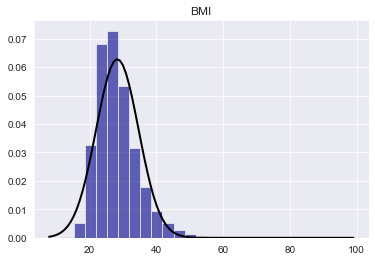

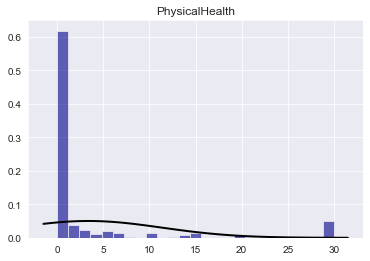

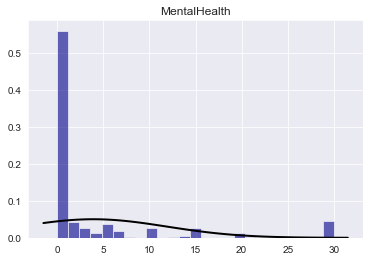

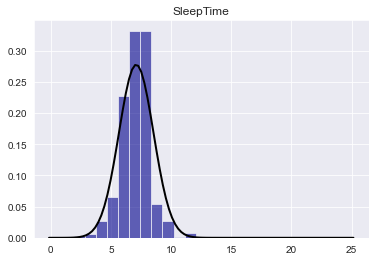

In [11]:
for column in data[cont_var]:
    data2 = data[column]
    mu, std = norm.fit(data2) 
    # Plot the histogram.
    plt.hist(data[column], bins=25, density=True, alpha=0.6, color='darkblue')
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2)
    title = str(column)
    plt.title(title) 
    plt.show()

#### Analysis of Continous Variables
It seems that both MentalHealth and PhysicalHealth are ordinal categorical variables, not continuous.
Both of the continuous variables have distributions that are close to normal, but not perfectly normal. 

In [12]:
data = pd.get_dummies(data)

In [13]:
data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


## Checking the goal

In [14]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [15]:
hd_no = df.query('HeartDisease == "No"')['HeartDisease'].count()
hd_yes = df.query('HeartDisease == "Yes"')['HeartDisease'].count()
pos = hd_yes / (hd_yes + hd_no)
pos

0.08559545959130067

There are only 8.5 percent positives in this data sample. Therefore, we have a class imbalance problem. 

In [16]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=120)

In [17]:
# copy to the alternate form of 
X_train = data_train
X_test = data_test
y_train = target_train
y_test = target_test

## Initial Model

AUC: 0.8397281729370933


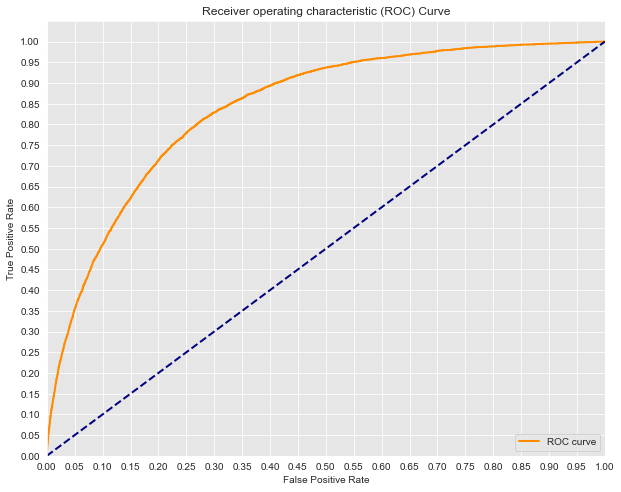

In [18]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label = 'Yes')
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
# Plot the ROC curve
plt.figure(figsize=(10, 8)) 
lw = 2 
plt.plot(fpr, tpr, color='darkorange', 
            lw=lw, label='ROC curve') 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)]) 
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right') 
plt.show()

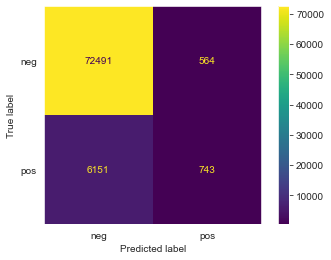

In [19]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=["neg", "pos"], values_format=".5g")
plt.grid(False)
plt.show()

### Tune Initial Model

LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.8306413125440083
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
AUC for 0.01: 0.839619289860676
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8397807540237427
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8397281729370933
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
AUC for 10: 0.8397206159695006
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
AUC for 100: 0.8397336371448745


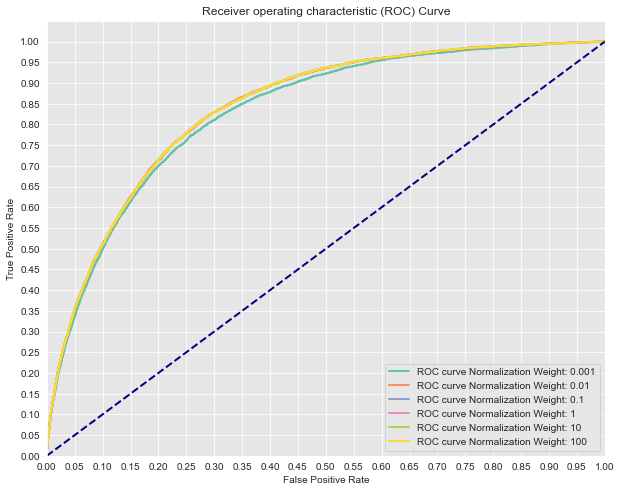

In [20]:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2') 
plt.figure(figsize=(10, 8)) 

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear') 
    model_log = logreg.fit(X_train, y_train)
    print(model_log) # Preview model params
    # Predict
    y_hat_test = logreg.predict(X_test) 
    y_score = logreg.fit(X_train, y_train).decision_function(X_test) 
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label= 'Yes')
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2 
    plt.plot(fpr, tpr, color=colors[n],
        lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.yticks([i/20.0 for i in range(21)]) 
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right') 
plt.show()

### SMOTE to help the models performance on the minority class

In [21]:
print(y_train.value_counts())
# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())

No     219367
Yes     20479
Name: HeartDisease, dtype: int64


Yes    219367
No     219367
Name: HeartDisease, dtype: int64


### Run Model with SMOTE-trained data

AUC: 0.7872469689084393


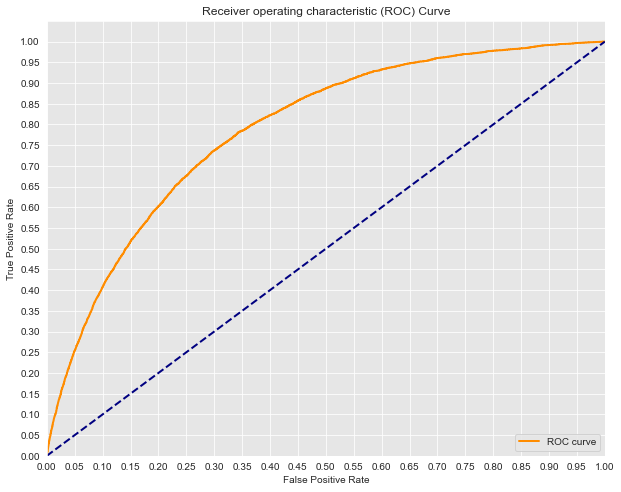

In [49]:
# Initial Model
logreg_s = LogisticRegression(fit_intercept=False, solver='liblinear')
# Probability scores for test set
y_score_s = logreg_s.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score_s, pos_label = 'Yes')
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))
# Plot the ROC curve
plt.figure(figsize=(10, 8)) 
lw = 2 
plt.plot(fpr, tpr, color='darkorange', 
            lw=lw, label='ROC curve') 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)]) 
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right') 
plt.show()

LogisticRegression(C=0.005, fit_intercept=False, solver='liblinear')
AUC for 0.005: 0.7888755470487053
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.787352792266764
LogisticRegression(C=0.2, fit_intercept=False, solver='liblinear')
AUC for 0.2: 0.7872799725645939
LogisticRegression(C=0.5, fit_intercept=False, solver='liblinear')
AUC for 0.5: 0.7872462660270605
LogisticRegression(C=0.8, fit_intercept=False, solver='liblinear')
AUC for 0.8: 0.7872507553343983
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.7872469689084393
LogisticRegression(C=1.25, fit_intercept=False, solver='liblinear')
AUC for 1.25: 0.7872336101911606
LogisticRegression(C=1.5, fit_intercept=False, solver='liblinear')
AUC for 1.5: 0.7872421480158185
LogisticRegression(C=2, fit_intercept=False, solver='liblinear')
AUC for 2: 0.7872321369200218


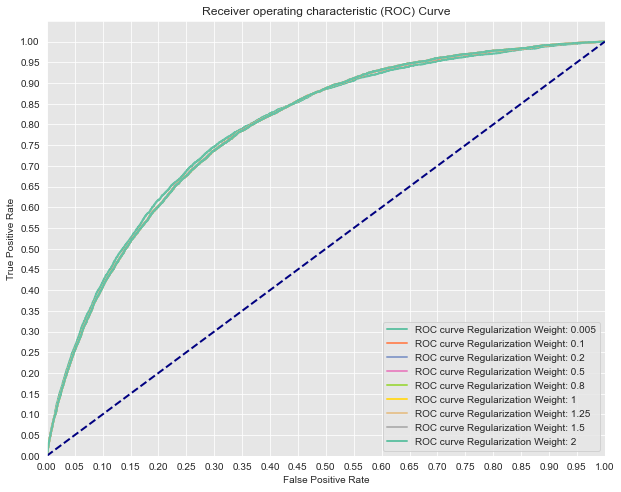

In [23]:
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names)) 
plt.figure(figsize=(10, 8)) 

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear') 
    model_log = logreg.fit(X_train_resampled, y_train_resampled) # Run the model with resamples
    print(model_log) # Preview model params
    # Predict
    y_hat_test = logreg.predict(X_test) 
    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test) 
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label= 'Yes')
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2 
    plt.plot(fpr, tpr, color=colors[n],
            lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.yticks([i/20.0 for i in range(21)]) 
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right') 
plt.show()

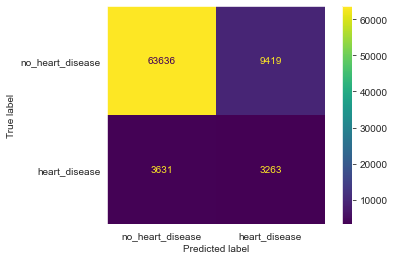

In [50]:
#Confusion Matrix
plot_confusion_matrix(logreg_s, X_test, y_test, display_labels=["no_heart_disease", "heart_disease"], values_format=".5g")
plt.grid(False)
plt.show()

## Decision Tree

In [51]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5)

In [52]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02840927, 0.00703803,
       0.32127396, 0.04721647, 0.08802984, 0.03080974, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0006303 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02816612, 0.01389726,
       0.00926877, 0.        , 0.        , 0.        , 0.12895638,
       0.06715169, 0.07944733, 0.        , 0.14970484, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

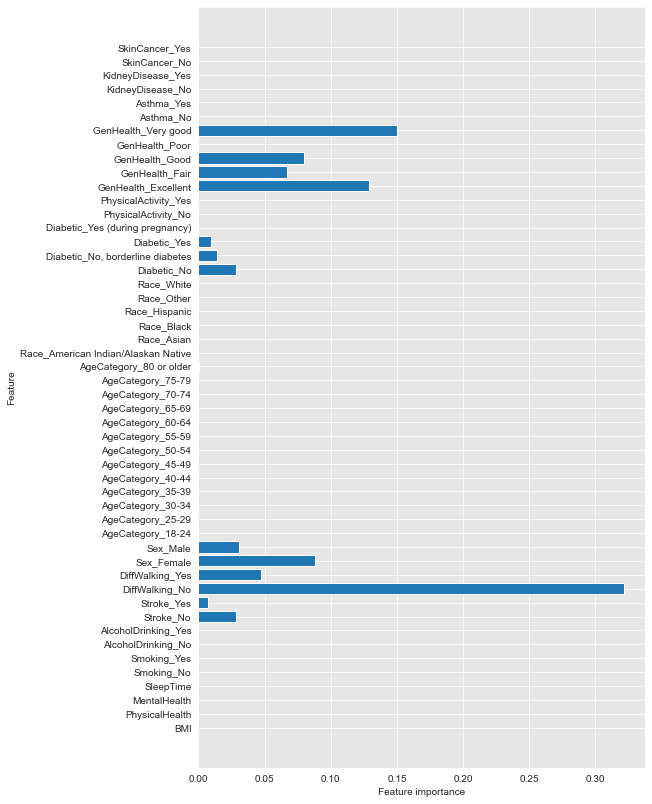

In [53]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8, 14))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [54]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[52096 20959]
 [ 2318  4576]]
              precision    recall  f1-score   support

          No       0.96      0.71      0.82     73055
         Yes       0.18      0.66      0.28      6894

    accuracy                           0.71     79949
   macro avg       0.57      0.69      0.55     79949
weighted avg       0.89      0.71      0.77     79949



In [55]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 70.89%


In [58]:
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label = 'yes')

## Bagged Trees (ensemble)

In [59]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [60]:
# Fit to the training data
bagged_tree.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [61]:
# Training accuracy score
bagged_tree.score(X_train_resampled, y_train_resampled).round(2)

0.75

In [63]:
# Test accuracy score
bagged_tree.score(X_test, y_test).round(2)

0.71

In [35]:
# Confusion

## Random Forest

In [36]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [37]:
# Training accuracy score
forest.score(data_train, target_train)

0.9151580597550094

In [38]:
# Test accuracy score
forest.score(data_test, target_test)

0.9145455227707664

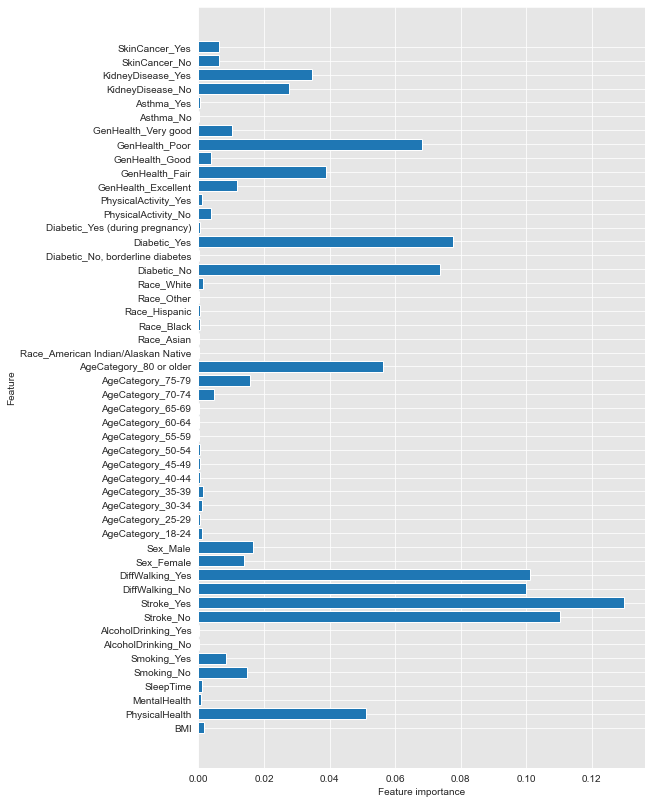

In [39]:
plot_feature_importances(forest)

In [40]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 5, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(max_depth=2, max_features=5, n_estimators=5)

In [41]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

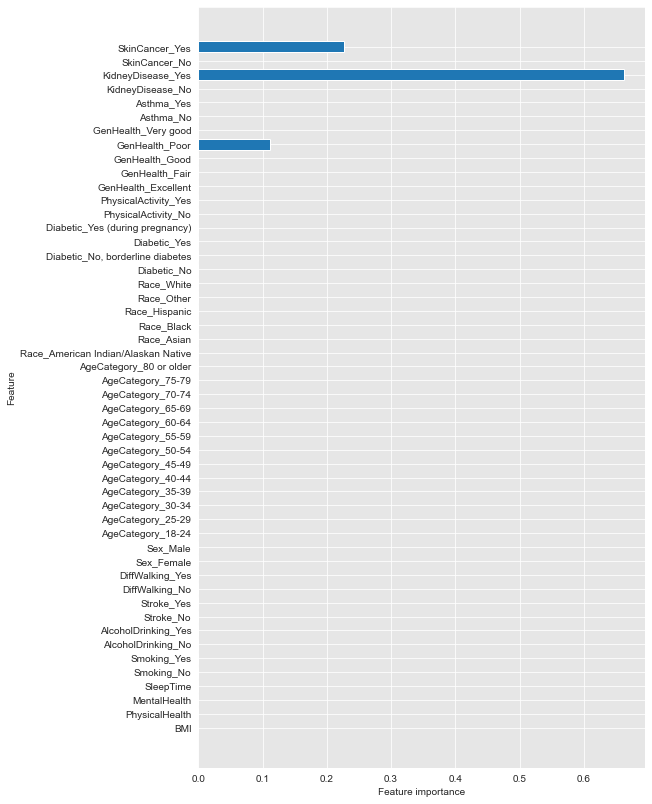

In [42]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [43]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

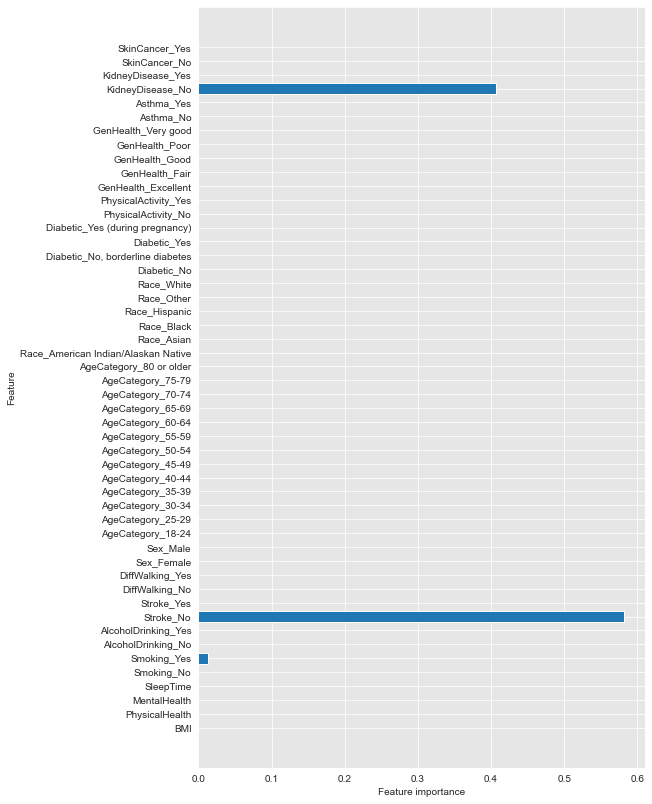

In [44]:
# Feature importance
plot_feature_importances(rf_tree_2)

## XGBOOST Model

In [45]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(data_train, target_train)

# Predict on training and test sets
training_preds = clf.predict(data_train)
test_preds = clf.predict(data_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 92.2%
Validation accuracy: 91.55%


### Tune XGBoost

In [46]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [47]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(data_train, target_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(data_train)
test_preds = grid_clf.predict(data_test)
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

KeyboardInterrupt: 

In [ ]:
print(confusion_matrix(target_test, test_preds))
print(classification_report(target_test, test_preds))

[[72585   470]
 [ 6267   627]]
              precision    recall  f1-score   support

          No       0.92      0.99      0.96     73055
         Yes       0.57      0.09      0.16      6894

    accuracy                           0.92     79949
   macro avg       0.75      0.54      0.56     79949
weighted avg       0.89      0.92      0.89     79949



In [ ]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(data_train, target_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [ ]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
# Fit the model to training data
model_log = logreg.fit(X_train, y_train)
# Predict on test set
y_hat_test = logreg.predict(X_test)
# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)
# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score, pos_label= 'Yes')
# Calculate the probability scores of each point in the test set
y_test_score = model_log.decision_function(X_test)
# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score, pos_label= 'Yes')

## Random Boost

## XTRA Leaves? Something outside of cirriculum